In [82]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import shapely

In [2]:
gdf_streets = gpd.read_file('../data/raw/Road_Centerline/geo_export_98b1d296-cbc4-4424-8155-c6916b2d958e.shp')

In [3]:
gdf_tracts = gpd.read_file('../data/raw/tracts/tl_2010_22071_tract10.shp')

In [4]:
gdf_nhoods = gpd.read_file('../data/raw/Neighborhood_Statistical_Areas/Neighborhood_Statistical_Areas.shp')

In [17]:
# 'fullname'
#gdf_streets.iloc[:5,:10]
#gdf_streets[['joinid', 'fullname']].sort_values('joinid')
joined_streets = gdf_streets.dissolve(by='joinid')

In [60]:
streets_nhoods = gpd.sjoin(joined_streets, neighborhoods)

In [55]:
joined_streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Float64Index: 2289 entries, 1.0 to 2400.0
Data columns (total 39 columns):
geometry      2289 non-null object
ownedby       158 non-null float64
esnleft       109 non-null object
afedrtetyp    0 non-null object
lasteditor    164 non-null object
roadlevel     114 non-null float64
fromright     2266 non-null float64
date_lastu    164 non-null object
time_lastu    164 non-null object
zipleft       0 non-null object
centerline    2285 non-null object
roadclass     2288 non-null object
fullname      2289 non-null object
toleft        2266 non-null float64
onewaydir     58 non-null object
esnright      109 non-null object
mtfcc         0 non-null object
toright       2266 non-null float64
fedrtetype    4 non-null object
astrtetype    0 non-null object
munileft      2264 non-null object
msagright     0 non-null object
muniright     2264 non-null object
fullnameab    2288 non-null object
astrte        0 non-null object
msagleft      0 non-null obje

In [63]:
streets_nhoods.head()

,geometry,ownedby,esnleft,afedrtetyp,lasteditor,roadlevel,fromright,date_lastu,time_lastu,zipleft,...,shape_leng,fromleft,stroute,fedroute,inwater,index_right,OBJECTID,GNOCDC_LAB,Shape_Leng,Shape_Area
1.0,"(LINESTRING (-90.116510797142 30.008607463472,...",NaN,None,None,None,NaN,6501.0,None,None,None,...,232.790089,6500.0,None,None,None,39,832,WEST END,26260.704755,2.214954e+07
2.0,(LINESTRING (-90.11746336900002 30.00866154986...,NaN,None,None,None,NaN,6401.0,None,None,None,...,116.459132,6400.0,None,None,None,39,832,WEST END,26260.704755,2.214954e+07
7.0,LINESTRING (-90.11534220490999 30.018289487643...,-1.0,3103,None,CMARD,0.0,2.0,2017-01-31,22:49:38.000,None,...,136.086814,1.0,None,None,No,39,832,WEST END,26260.704755,2.214954e+07
16.0,"(LINESTRING (-90.119264512594 29.999995589311,...",NaN,None,None,None,NaN,101.0,None,None,None,...,313.564403,100.0,None,None,None,39,832,WEST END,26260.704755,2.214954e+07
17.0,"(LINESTRING (-90.119210121598 30.000821079721,...",NaN,None,None,None,NaN,301.0,None,None,None,...,300.818017,300.0,None,None,None,39,832,WEST END,26260.704755,2.214954e+07


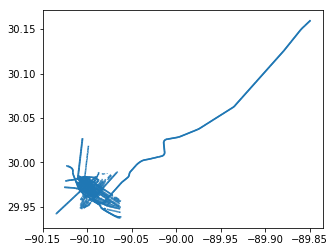

In [68]:
streets_nhoods[streets_nhoods['GNOCDC_LAB'] == 'MID-CITY'].plot()

In [52]:
joined_streets = joined_streets.to_crs(neighborhoods.crs)

In [47]:
neighborhoods = gdf_nhoods.to_crs(epsg=4326)

In [37]:
help(gpd.sjoin)

Help on function sjoin in module geopandas.tools.sjoin:

sjoin(left_df, right_df, how='inner', op='intersects', lsuffix='left', rsuffix='right')
    Spatial join of two GeoDataFrames.
    
    Parameters
    ----------
    left_df, right_df : GeoDataFrames
    how : string, default 'inner'
        The type of join:
    
        * 'left': use keys from left_df; retain only left_df geometry column
        * 'right': use keys from right_df; retain only right_df geometry column
        * 'inner': use intersection of keys from both dfs; retain only
          left_df geometry column
    op : string, default 'intersection'
        Binary predicate, one of {'intersects', 'contains', 'within'}.
        See http://toblerity.org/shapely/manual.html#binary-predicates.
    lsuffix : string, default 'left'
        Suffix to apply to overlapping column names (left GeoDataFrame).
    rsuffix : string, default 'right'
        Suffix to apply to overlapping column names (right GeoDataFrame).



In [73]:
nhoods = gdf_nhoods.copy()

In [75]:
nhoods.crs = {'init': 'epsg:4326'}

In [83]:
street_nhood = gdf_streets.intersection(nhoods)

In [88]:
gpd.sjoin(gdf_streets, neighborhoods)

,ownedby,esnleft,afedrtetyp,lasteditor,roadlevel,joinid,fromright,date_lastu,time_lastu,zipleft,...,fromleft,stroute,fedroute,inwater,geometry,index_right,OBJECTID,GNOCDC_LAB,Shape_Leng,Shape_Area
0,NaN,None,None,None,NaN,1821.0,4701.0,None,None,None,...,4700.0,None,None,None,LINESTRING (-90.00011910664099 30.018244915523...,51,844,PLUM ORCHARD,22797.656091,2.713204e+07
49,NaN,None,None,None,NaN,597.0,7500.0,None,None,None,...,7501.0,None,None,None,LINESTRING (-90.00011910664099 30.018244915523...,51,844,PLUM ORCHARD,22797.656091,2.713204e+07
67,NaN,None,None,None,NaN,1821.0,4401.0,None,None,None,...,4400.0,None,None,None,LINESTRING (-89.99974757605899 30.014380018993...,51,844,PLUM ORCHARD,22797.656091,2.713204e+07
138,NaN,None,None,None,NaN,1737.0,7400.0,None,None,None,...,7401.0,None,None,None,"LINESTRING (-90.001245115188 30.015179458427, ...",51,844,PLUM ORCHARD,22797.656091,2.713204e+07
409,NaN,None,None,None,NaN,1610.0,4701.0,None,None,None,...,4700.0,None,None,None,LINESTRING (-90.00302478458001 30.016536310996...,51,844,PLUM ORCHARD,22797.656091,2.713204e+07
465,NaN,None,None,None,NaN,875.0,7950.0,None,None,None,...,7923.0,None,None,None,"LINESTRING (-89.994722351319 30.020966352335, ...",51,844,PLUM ORCHARD,22797.656091,2.713204e+07
670,NaN,None,None,None,NaN,1079.0,4519.0,None,None,None,...,4520.0,None,None,None,"LINESTRING (-90.004869410761 30.0140080069, -9...",51,844,PLUM ORCHARD,22797.656091,2.713204e+07
772,NaN,None,None,None,NaN,597.0,7200.0,None,None,None,...,7201.0,None,None,None,LINESTRING (-90.00316669703901 30.018021400697...,51,844,PLUM ORCHARD,22797.656091,2.713204e+07
849,NaN,None,None,None,NaN,597.0,0.0,None,None,None,...,0.0,None,None,None,"LINESTRING (-89.999255721426 30.018302747949, ...",51,844,PLUM ORCHARD,22797.656091,2.713204e+07
1032,NaN,None,None,None,NaN,1174.0,4801.0,None,None,None,...,4800.0,None,None,None,"LINESTRING (-90.00152696178201 30.01813903712,...",51,844,PLUM ORCHARD,22797.656091,2.713204e+07


In [71]:
gdf_nhoods.to_crs()

{'proj': 'lcc',
 'lat_1': 29.3,
 'lat_2': 30.7,
 'lat_0': 28.5,
 'lon_0': -91.33333333333333,
 'x_0': 1000000,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

In [72]:
help(gpd.GeoDataFrame.to_crs)

Help on function to_crs in module geopandas.geodataframe:

to_crs(self, crs=None, epsg=None, inplace=False)
    Transform geometries to a new coordinate reference system
    
    This method will transform all points in all objects.  It has
    no notion or projecting entire geometries.  All segments
    joining points are assumed to be lines in the current
    projection, not geodesics.  Objects crossing the dateline (or
    other projection boundary) will have undesirable behavior.
    
    `to_crs` passes the `crs` argument to the `Proj` function from the
    `pyproj` library (with the option `preserve_units=True`). It can
    therefore accept proj4 projections in any format
    supported by `Proj`, including dictionaries, or proj4 strings.

